In [40]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [46]:
lectura=[]
err_lect=[]
R=np.array([4910,4420,3790,3110,2470,1820,1321,761,296,25,1])
error_R=np.array([10,10,10,10,10,10,1,1,1,0.1,0.1])
archivos=['Voltaje_R4910.txt','Voltaje_R4420.txt','Voltaje_R3790.txt','Voltaje_R3110.txt','Voltaje_R2470.txt','Voltaje_R1820.txt','Voltaje_R1321.txt','Voltaje_R0761.txt','Voltaje_R0296.txt','Voltaje_R0025.txt','Voltaje_R0001.txt']
for i in archivos:
    ard=np.loadtxt(i)
    lectura.append(np.mean(ard[:,1]))
    err_lect.append(np.std(ard[:,1]))
    
lectura=np.array(lectura)

In [37]:
I=5/max(R)
err_I=5*10/max(R)**2
V=R*I
errorV=np.sqrt((R*err_I)**2+(I*error_R)**2)

In [39]:
errorV

array([0.01440136, 0.01370162, 0.01286413, 0.01205419, 0.01139922,
       0.01086037, 0.00292287, 0.00187831, 0.00118906, 0.00011427,
       0.00010185])

In [41]:
f = lambda x, A, B: A * x + B

# Ajustamos, pero con las funciónes logaritmicas. Usamos propagación de errores
popt, pcov = curve_fit(f, lectura, V, sigma = errorV, 
                       absolute_sigma=True)

print(popt)
print(pcov)



[0.00489764 0.01103836]
[[ 2.67839391e-11 -2.65186880e-11]
 [-2.65186880e-11  5.76946348e-09]]


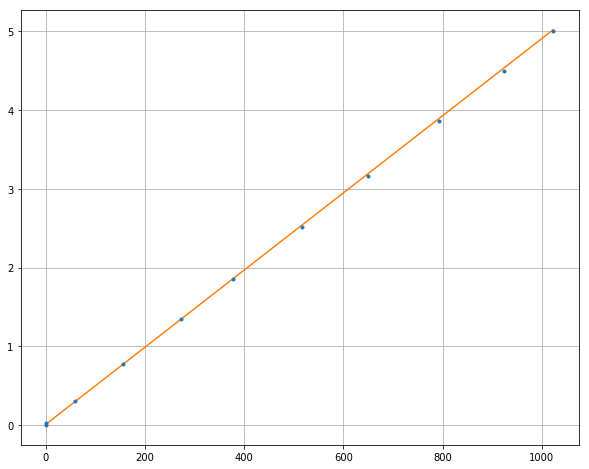

In [61]:
plt.figure(figsize=(10,8))
plt.errorbar(lectura,V,yerr=errorV,fmt='.')
plt.plot(lectura,popt[1]+popt[0]*lectura)
plt.grid()